# Seção principal

In [3]:
#libraries
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import cluster


In [4]:
data = sns.load_dataset("iris") 

In [5]:
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris = data

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
#sns.pairplot(iris)

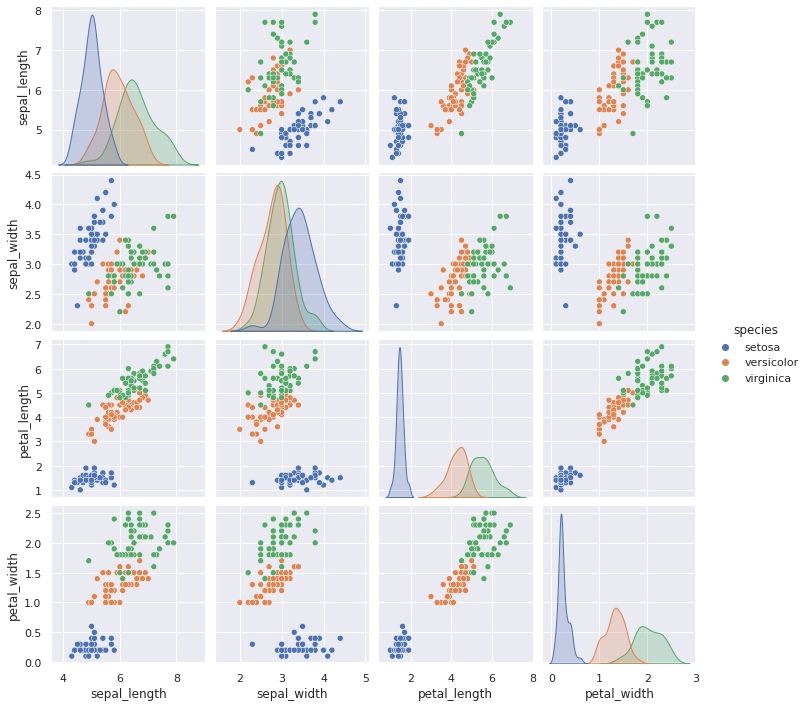

In [10]:
sns.pairplot(iris, hue="species")

In [11]:
iris2d_sepal = data[['sepal_length', 'sepal_width']]

In [12]:
iris2d_sepal

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


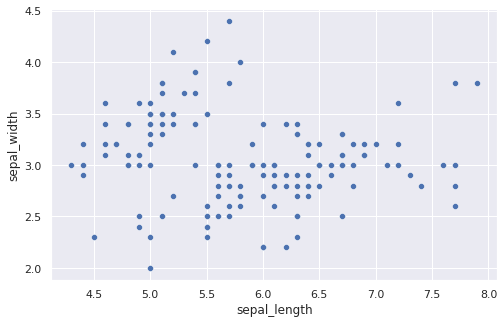

In [13]:
fig, axe = plt.subplots(figsize=(8,5))
axe = sns.scatterplot(data=iris2d_sepal, x='sepal_length', y='sepal_width')
plt.show()

In [14]:
kmeans = cluster.KMeans(3)
clusters = kmeans.fit_predict(iris2d_sepal)

53 / 50 / 47

In [15]:
pd.value_counts(clusters)

2    53
1    50
0    47
dtype: int64

In [37]:
x_center, y_center = kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
x_center, y_center

(array([5.9016129, 5.006    , 6.85     ]),
 array([2.7483871 , 3.428     , 3.07368421]))

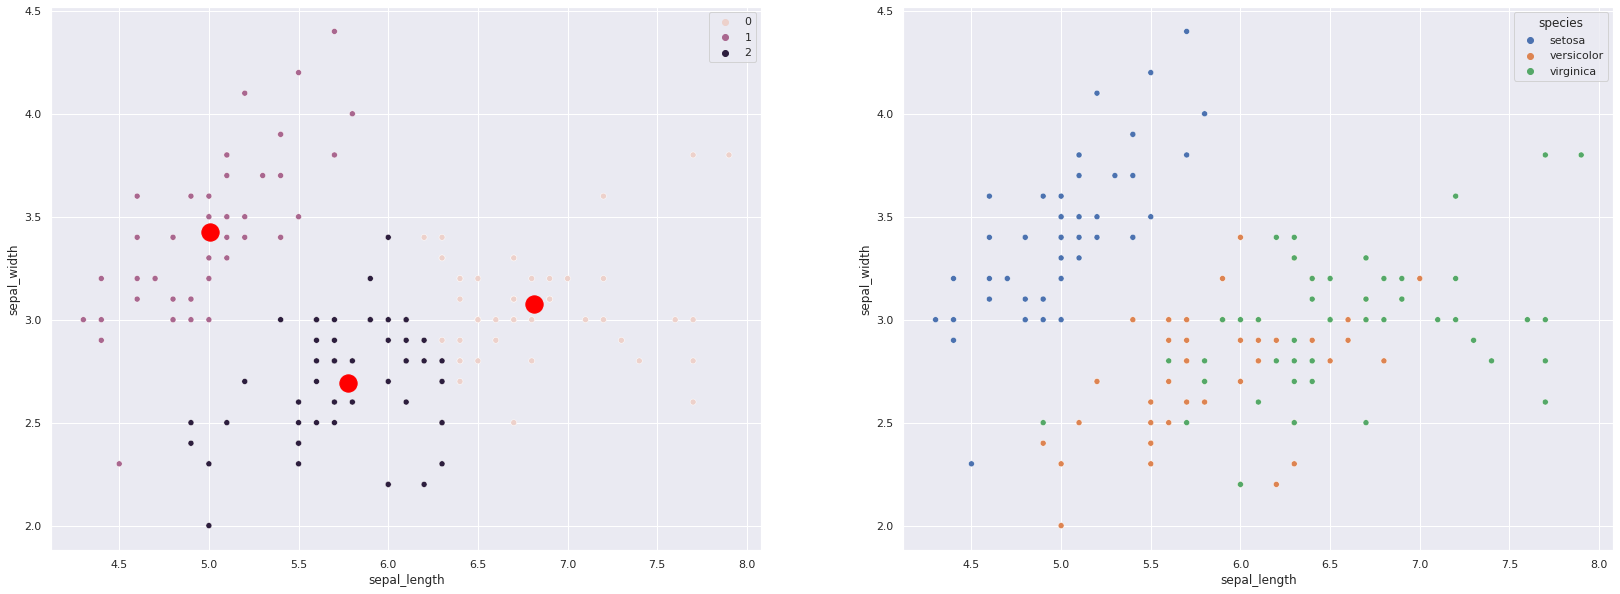

In [17]:
fig, (axe1, axe2) = plt.subplots(1,2, figsize=(28,10))

sns.scatterplot(data=iris2d_sepal, x='sepal_length', y='sepal_width', hue=clusters, ax=axe1)
axe1.scatter(x=x_center, y=y_center, s = 300, color='red')
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue="species", ax=axe2)
plt.show()

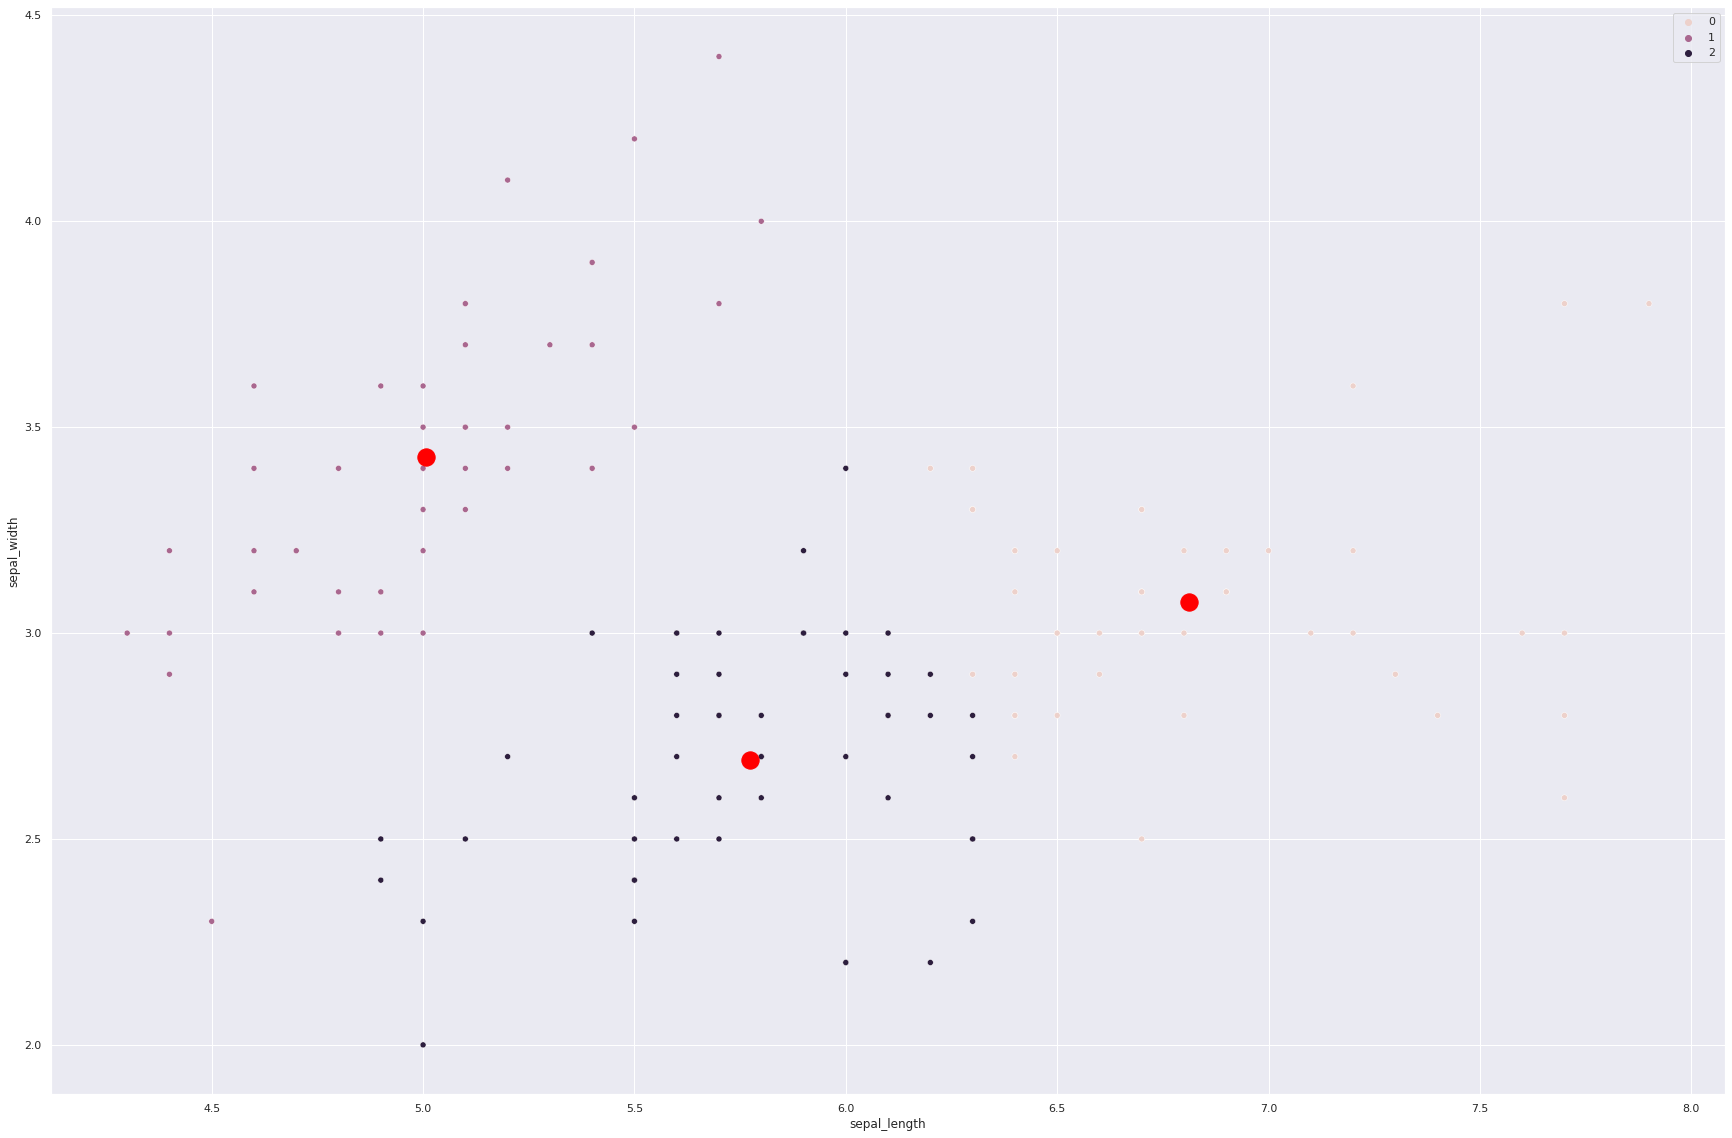

In [18]:
fig, (axe1) = plt.subplots(1,1, figsize=(30,20))

sns.scatterplot(data=iris2d_sepal, x='sepal_length', y='sepal_width', hue=clusters, ax=axe1)
axe1.scatter(x=x_center, y=y_center, s = 300, color='red')
plt.show()

PETAL & PETAL

In [19]:
iris2d_petal = data[['petal_length', 'petal_width']]

In [20]:
kmeans_petal = cluster.KMeans(3,random_state=0)
clusters_petal = kmeans.fit_predict(iris2d_petal)

In [21]:
pd.value_counts(clusters_petal)

0    52
1    50
2    48
dtype: int64

SEPAL PETAL

In [22]:
iris2d_sp = data[['sepal_length', 'petal_width']]

In [23]:
kmeans_sp = cluster.KMeans(3,random_state=0)
clusters_sp = kmeans.fit_predict(iris2d_sp)

In [24]:
pd.value_counts(clusters_sp)

1    54
2    52
0    44
dtype: int64

FULL

In [25]:
Xin=np.array(iris.drop('species',axis=1))

In [26]:
Xin.shape

(150, 4)

In [27]:
kmeans_full = cluster.KMeans(3,random_state=0)
clusters_full = kmeans.fit_predict(Xin)

62 50 38

In [28]:
clusters_full.shape

(150,)

In [29]:
pd.value_counts(clusters_full)

0    62
1    50
2    38
dtype: int64

In [30]:
Xin=np.array(iris.drop('species',axis=1))

In [31]:
Xin.shape

(150, 4)

In [32]:
Xin[149,3]

1.8

LOOP

In [33]:
from sklearn.cluster import KMeans

In [34]:

distortions = []
n_clusters = range(2,10)
for nclus in n_clusters:
    print(nclus)
    distortions.append( KMeans(n_clusters=nclus).fit(Xin).inertia_ )

2
3
4
5
6
7
8
9


In [35]:
distortions

[152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.058459040959036,
 34.53097186147187,
 30.571273668360625,
 28.043838171632288]

([<matplotlib.axis.XTick at 0x7f3cba73f290>,
 <a list of 8 Text major ticklabel objects>)

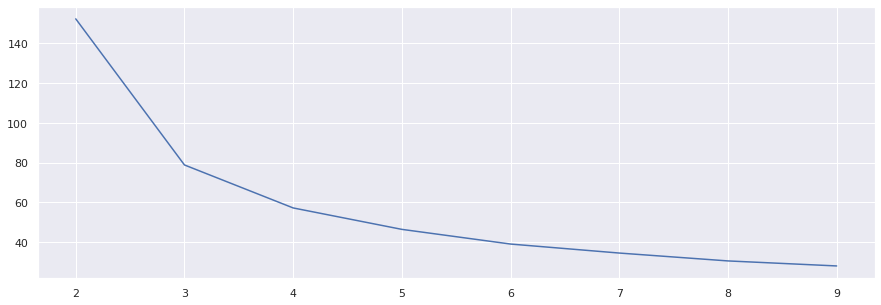

In [36]:
plt.figure(figsize=(15,5))
plt.plot(n_clusters,distortions)
plt.xticks(n_clusters)